# **Programming for Applied Deep Learning (GKSG008-01)**
> ### **20181202 김수미**
> ### Linear Regression and Neural Network : Experiment Based on 10/12 Lecture

**1. Python Libraries**

In [ ]:
pip install d2l

In [175]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils import data
from d2l import torch as d2l
from torch import nn

**2. Define Functions**

In [176]:
# PyTorch data iterator(data loader)
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# Generate : Y = wX + b + noise
# Normal dist function : create random noise out of Normal(0, 0.01)
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  Y = torch.matmul(X,w) + b
  Y += torch.normal(0, 1., Y.shape) 
  return X, Y.reshape((-1,1))

**3. Set Parameters**

In [177]:
# True values(weight,bias) and dataset that our neural network will estimate
true_w = torch.tensor([2.0])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 100)

# Batch size and Minibatch Set
batch_size = 10
data_iter = load_array((features, labels), batch_size)

# Neural net, Loss function and Trainer
# MSE Loss function : f(x) = (ypred-y)^2
net = nn.Sequential(nn.Linear(in_features=1, out_features=1))
loss = nn.MSELoss() 
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

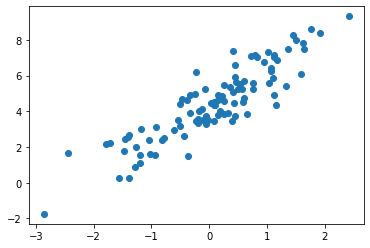

In [178]:
# True Values : 100 data
graph = plt.scatter(features, labels)
plt.show(graph)

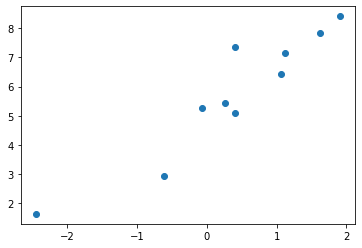

In [179]:
# One Minibatch : 10 data
dataset = next(iter(data_iter))
graph = plt.scatter(dataset[0], dataset[1])
plt.show(graph)

**4. Training**

In [180]:
# Execute training : epoch = 50
loss_results = []
num_epochs = 50
for epoch in range(num_epochs):
    for X, Y in data_iter:
        ypred = net(X)
        mseloss = loss(ypred, Y)
        loss_results.append(mseloss.item())
        trainer.zero_grad()
        mseloss.backward()
        trainer.step()
    l = loss(net(features), labels)
    if epoch % 10 == 9:
      print(f'epoch {epoch + 1}, loss {l:f}')

epoch 10, loss 0.850024
epoch 20, loss 0.850158
epoch 30, loss 0.850279
epoch 40, loss 0.850125
epoch 50, loss 0.850109


**5. Training Result**

In [181]:
# Estimated result after training
w = net[0].weight.data
print('Gap between (true_w, predicted_w) :', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('Gap between (true_b, predicted_b) :', true_b - b)

Gap between (true_w, predicted_w) : tensor([0.1198])
Gap between (true_b, predicted_b) : tensor([-0.1292])


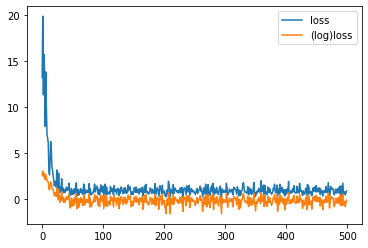

In [182]:
# Sequential graph of Loss value
graph = plt.plot(loss_results,label='loss'), plt.plot(np.log(loss_results),label='(log)loss'), plt.legend()
plt.show(graph)

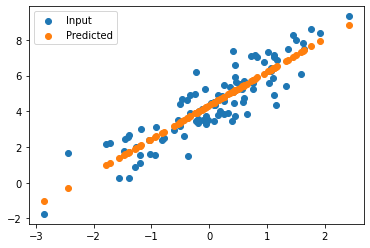

In [183]:
# Comparison between Input values and Predicted values(Linear Regression)
ypred = net(features)
graph = plt.scatter(features.reshape(-1), labels, label='Input') \
,plt.scatter(features.reshape(-1), ypred.detach(), label='Predicted') \
,plt.legend()
plt.show(graph)

**6. The Process of Training**

In [184]:
# Initialize Parameters
true_w = torch.tensor([2.0])
true_b = 2
features, labels = synthetic_data(true_w, true_b, 100)

batch_size = 2
data_iter = load_array((features, labels), batch_size)

net = nn.Sequential(nn.Linear(in_features=1, out_features=1))
loss = nn.MSELoss() 
trainer = torch.optim.SGD(net.parameters(), lr=0.002)

In [185]:
# Training
loss_results = []
ypreds = []
num_epochs = 20
for epoch in range(num_epochs):
    for X, Y in data_iter:
        ypred = net(X)
        mseloss = loss(ypred, Y)
        loss_results.append(mseloss.item())
        trainer.zero_grad()
        mseloss.backward()
        trainer.step()
    ypreds.append(net(features))
    l = loss(net(features), labels)
    if epoch in [0,1,2,5,19]:
      print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 6.060537
epoch 2, loss 4.258956
epoch 3, loss 3.082320
epoch 6, loss 1.470322
epoch 20, loss 0.847665


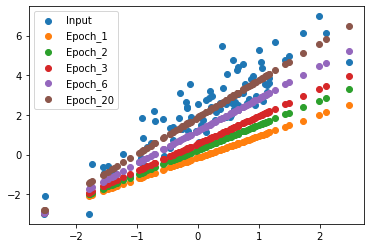

In [186]:
graph = plt.scatter(features.reshape(-1), labels, label='Input') \
,plt.scatter(features.reshape(-1), ypreds[0].detach(), label='Epoch_1') \
,plt.scatter(features.reshape(-1), ypreds[1].detach(), label='Epoch_2') \
,plt.scatter(features.reshape(-1), ypreds[2].detach(), label='Epoch_3') \
,plt.scatter(features.reshape(-1), ypreds[5].detach(), label='Epoch_6') \
,plt.scatter(features.reshape(-1), ypreds[19].detach(), label='Epoch_20') \
,plt.legend()
plt.show(graph)